In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df = pd.read_csv('t20-world-cup-22.csv')

In [14]:
#Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [10]:
#Head
df.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


In [16]:
df['first innings score'].value_counts().head(6)

first innings score
179.0    3
144.0    2
157.0    2
168.0    2
185.0    2
200.0    1
Name: count, dtype: int64

In [17]:
df['first innings wickets'].value_counts().head(6)

first innings wickets
8.0     9
6.0     5
5.0     4
10.0    3
9.0     3
7.0     2
Name: count, dtype: int64

In [18]:
df['winner'].unique()

array(['New Zealand', 'England', 'Sri lanka', 'India', 'Bangladesh', nan,
       'Australia', 'Ireland', 'South Africa', 'Zimbabwe', 'Pakistan',
       'Netherlands'], dtype=object)

In [19]:
df['venue'].unique()

array(['SCG', 'Optus Stadium', 'Blundstone Arena', 'MCG', 'The Gabba',
       'Adelaide Oval'], dtype=object)

In [20]:
len(df['winner'].unique())

12

In [21]:
len(df['venue'].unique())

6

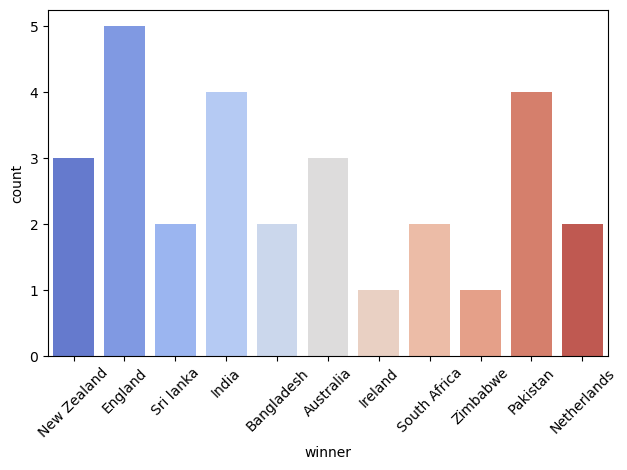

In [25]:
#Plots
sns.countplot(x='winner',data = df,palette = 'coolwarm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

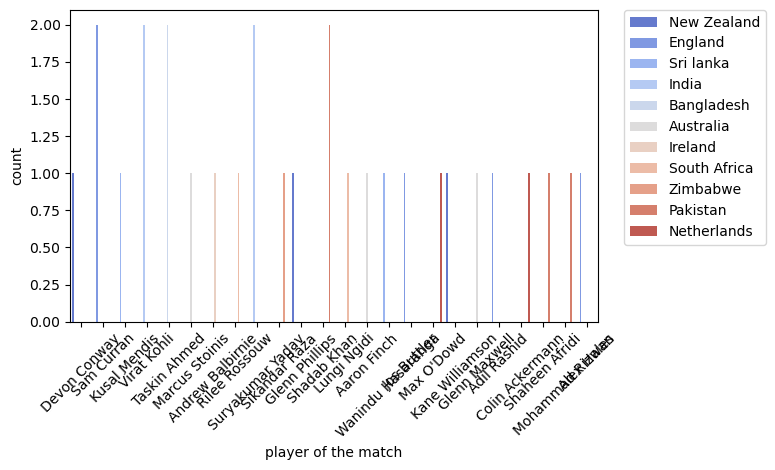

In [78]:
sns.countplot(x='player of the match',data = df,palette = 'coolwarm',hue = 'winner')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()


In [30]:
score = df.groupby('second innings score').count()

In [31]:
score.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
second innings score,,,,,,,,,,,,,,,,
51.0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
95.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
101.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
102.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
105.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='second innings score'>

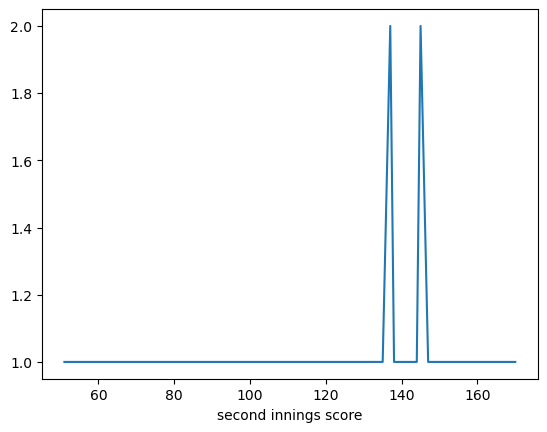

In [77]:
score['top scorer'].plot()

<Axes: xlabel='second innings score'>

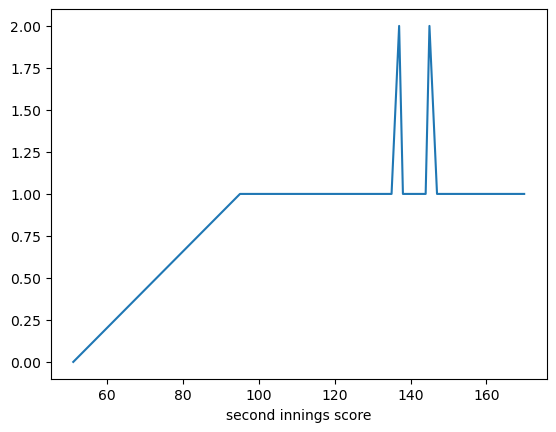

In [32]:
score['player of the match'].plot()

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


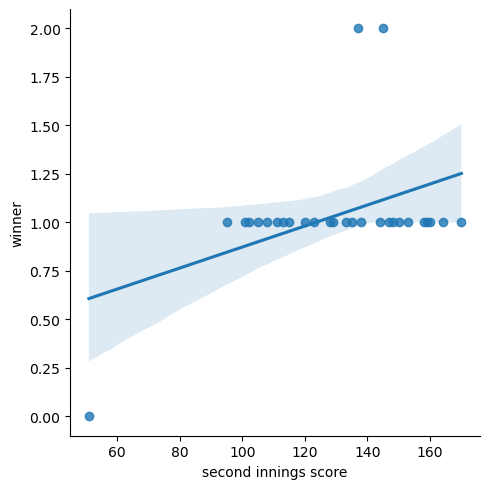

In [34]:
sns.lmplot(x='second innings score',y='winner',data=score.reset_index())

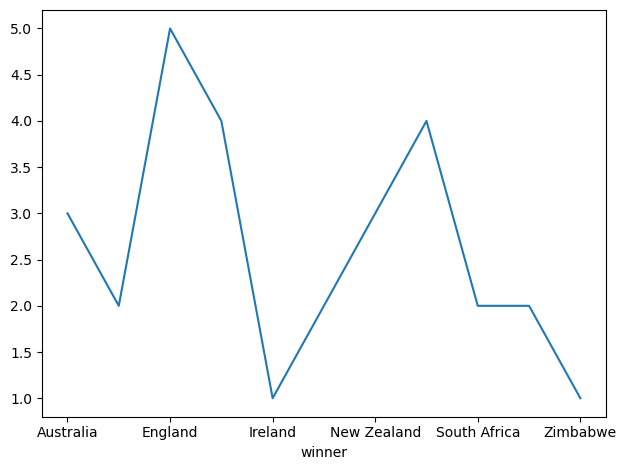

In [38]:
df.groupby('winner').count()['best bowling figure'].plot()
plt.tight_layout()

In [41]:
df.groupby(by=['toss winner','toss decision']).count()

venue  team1  team2  stage  first innings score  \
toss winner  toss decision                                                    
Afghanistan  Bat                1      1      1      1                    1   
             Field              1      1      1      1                    1   
Australia    Field              2      2      2      2                    2   
Bangladesh   Bat                2      2      2      2                    2   
             Field              1      1      1      1                    1   
England      Bat                1      1      1      1                    1   
             Field              4      4      4      4                    4   
India        Bat                3      3      3      3                    3   
             Field              1      1      1      1                    1   
Ireland      Bat                1      1      1      1                    1   
             Field              2      2      2      2                    2   
Netherlands  Bat                1      1      1      1                    1   
             Field              1      1      1      1                    1   
New Zealand  Bat                2      2      2      2                    2   
Pakistan     Bat                1      1      1      1                    1   
South Africa Bat                1      1      1      1                    1   
             Field              1      1      1      1                    1   
Sri lanka    Bat                1      1      1      1                    1   
Zimbabwe     Bat                3      3      3      3                    3   

                            first innings wickets  second innings score  \
toss winner  toss decision                                                
Afghanistan  Bat                                1                     1   
             Field                              1                     1   
Australia    Field                              2                     2   
Bangladesh   Bat                                2                     2   
             Field                              1                     1   
England      Bat                                1                     1   
             Field                              4                     4   
India        Bat                                3                     3   
             Field                              1                     1   
Ireland      Bat                                1                     1   
             Field                              2                     2   
Netherlands  Bat                                1                     1   
             Field                              1                     1   
New Zealand  Bat                                2                     2   
Pakistan     Bat                                1                     1   
South Africa Bat                                1                     1   
             Field                              1                     1   
Sri lanka    Bat                                1                     1   
Zimbabwe     Bat                                3                     3   

                            second innings wickets  winner  won by  \
toss winner  toss decision                                           
Afghanistan  Bat                                 1       1       1   
             Field                               1       1       1   
Australia    Field                               2       2       2   
Bangladesh   Bat                                 2       2       2   
             Field                               1       1       1   
England      Bat                                 1       1       1   
             Field                               4       4       4   
India        Bat                                 3       3       3   
             Field                               1       1       1   
Ireland      Bat      

In [42]:
df.groupby(by=['toss winner','toss decision']).count()['player of the match']

toss winner   toss decision
Afghanistan   Bat              1
              Field            1
Australia     Field            2
Bangladesh    Bat              2
              Field            1
England       Bat              1
              Field            4
India         Bat              3
              Field            1
Ireland       Bat              1
              Field            2
Netherlands   Bat              1
              Field            1
New Zealand   Bat              2
Pakistan      Bat              1
South Africa  Bat              1
              Field            1
Sri lanka     Bat              1
Zimbabwe      Bat              2
Name: player of the match, dtype: int64

In [45]:
df.groupby(by=['toss winner','toss decision']).count()['winner']

toss winner   toss decision
Afghanistan   Bat              1
              Field            1
Australia     Field            2
Bangladesh    Bat              2
              Field            1
England       Bat              1
              Field            4
India         Bat              3
              Field            1
Ireland       Bat              1
              Field            2
Netherlands   Bat              1
              Field            1
New Zealand   Bat              2
Pakistan      Bat              1
South Africa  Bat              1
              Field            1
Sri lanka     Bat              1
Zimbabwe      Bat              2
Name: winner, dtype: int64

In [68]:
play = df.groupby(by=['toss winner','toss decision']).count()['player of the match'].unstack()
play

toss decision,Bat,Field
toss winner,,
Afghanistan,1.0,1.0
Australia,NaN,2.0
Bangladesh,2.0,1.0
England,1.0,4.0
India,3.0,1.0
Ireland,1.0,2.0
Netherlands,1.0,1.0
New Zealand,2.0,NaN
Pakistan,1.0,NaN


In [49]:
toss = df.groupby(by=['toss winner','toss decision']).count()['winner'].unstack()

In [50]:
toss

toss decision,Bat,Field
toss winner,,
Afghanistan,1.0,1.0
Australia,NaN,2.0
Bangladesh,2.0,1.0
England,1.0,4.0
India,3.0,1.0
Ireland,1.0,2.0
Netherlands,1.0,1.0
New Zealand,2.0,NaN
Pakistan,1.0,NaN


<Axes: xlabel='toss decision', ylabel='toss winner'>

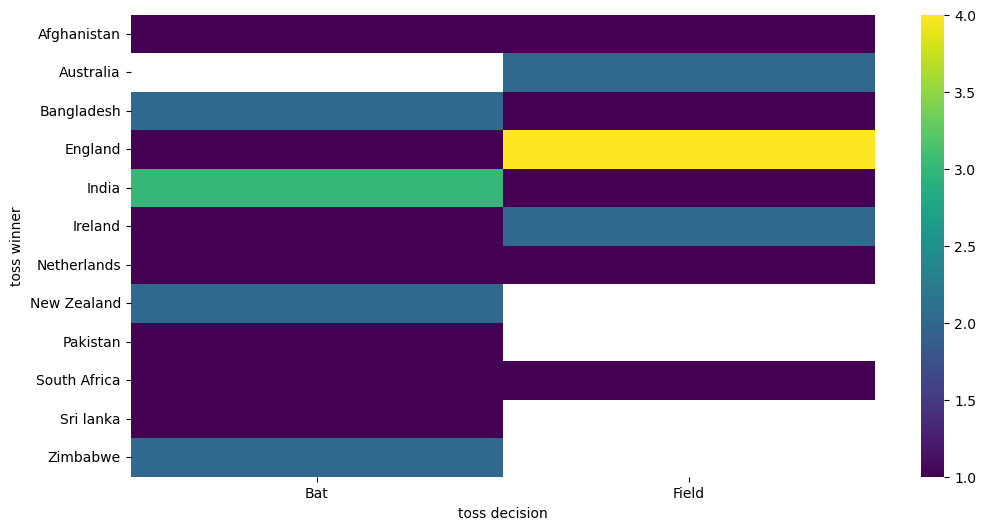

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(toss,cmap='viridis')

In [76]:
fly = df.groupby(by=['toss decision','won by']).count()['top scorer'].unstack()
fly.head()

won by,Runs,Wickets
toss decision,,
Bat,8,8
Field,8,5


C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


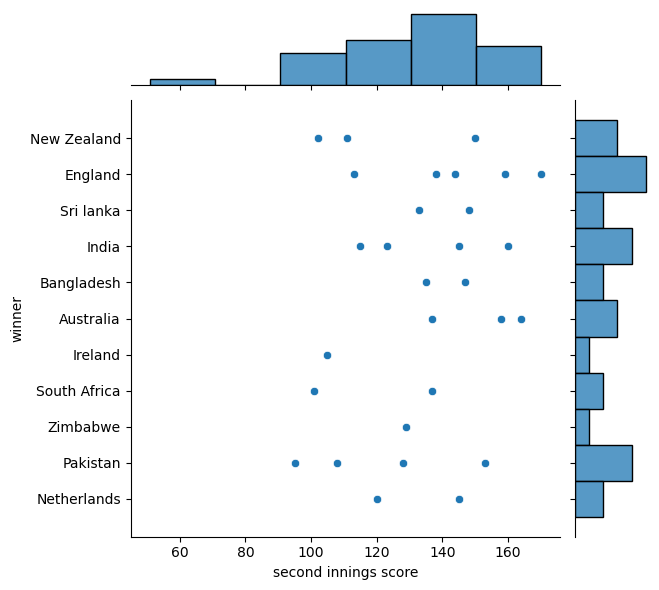

In [81]:
sns.jointplot(x='second innings score',y='winner',data=df,kind='scatter')

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

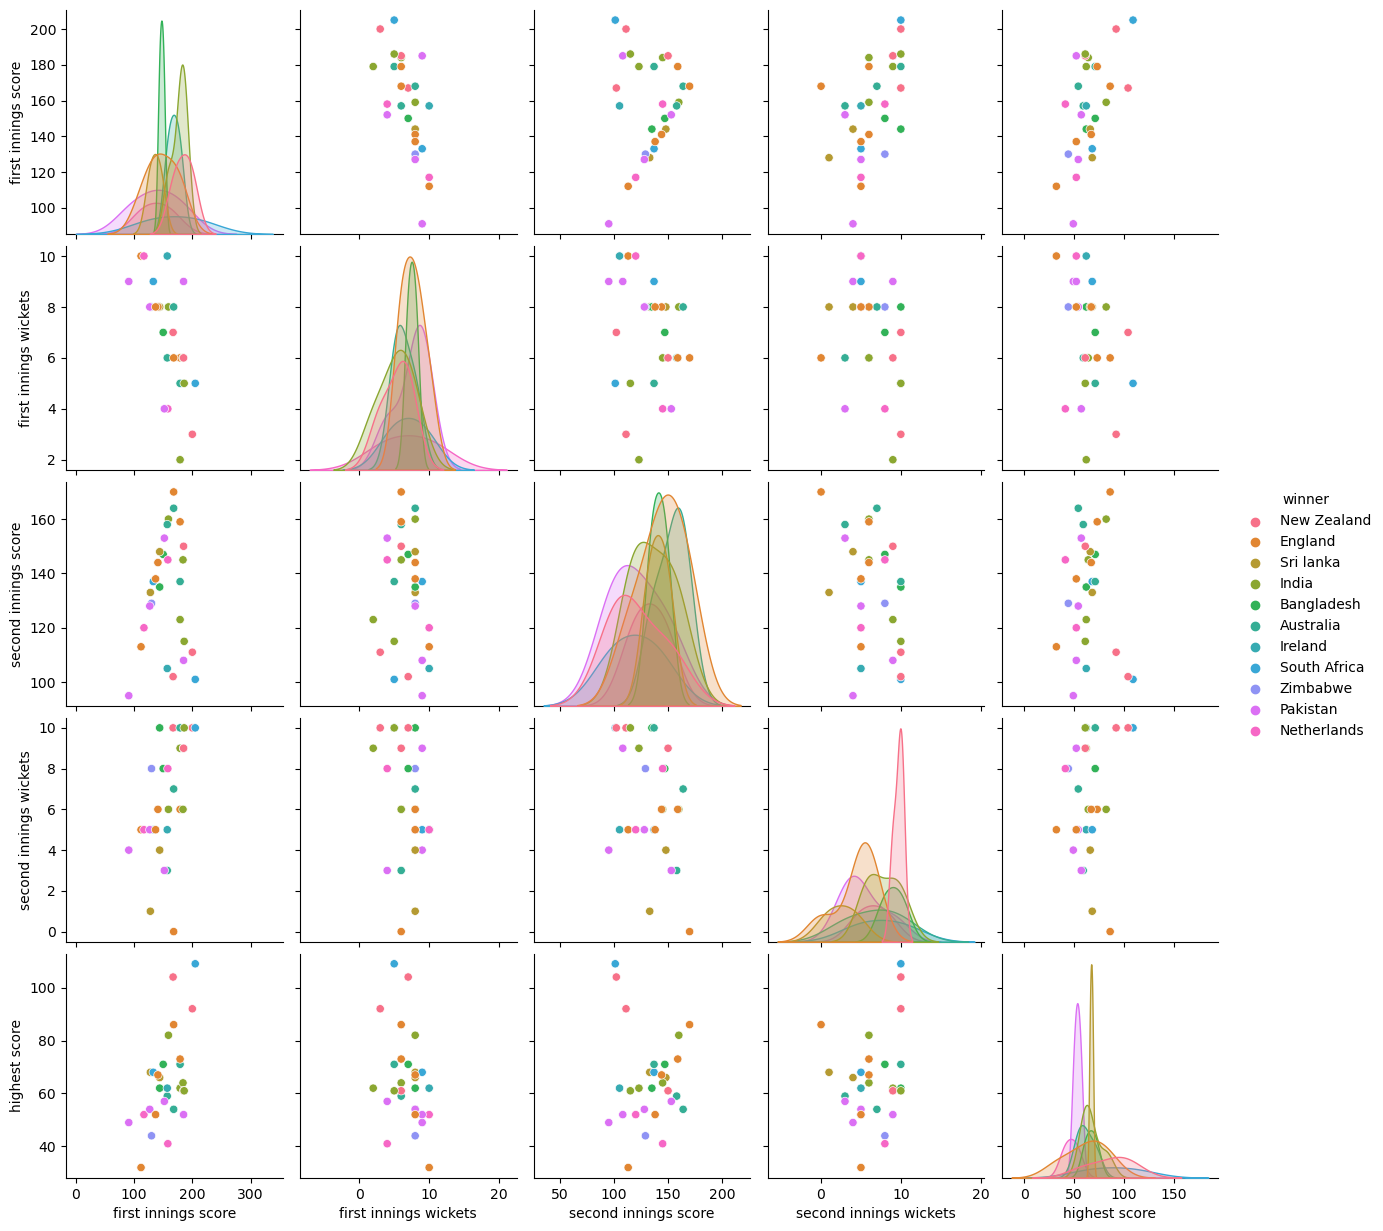

In [90]:
sns.pairplot(df,hue='winner')

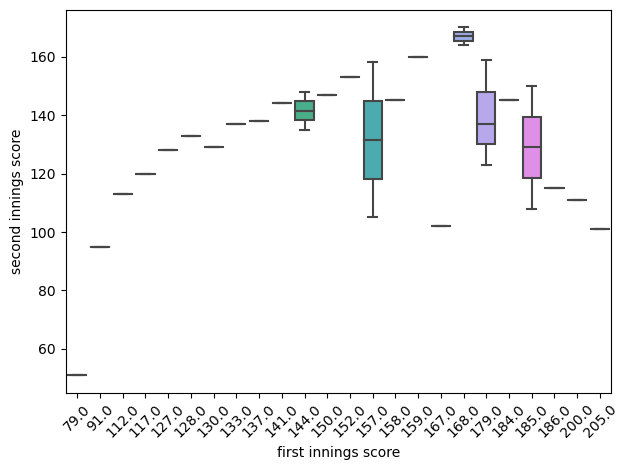

In [98]:
sns.boxplot(x='first innings score',y='second innings score',data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

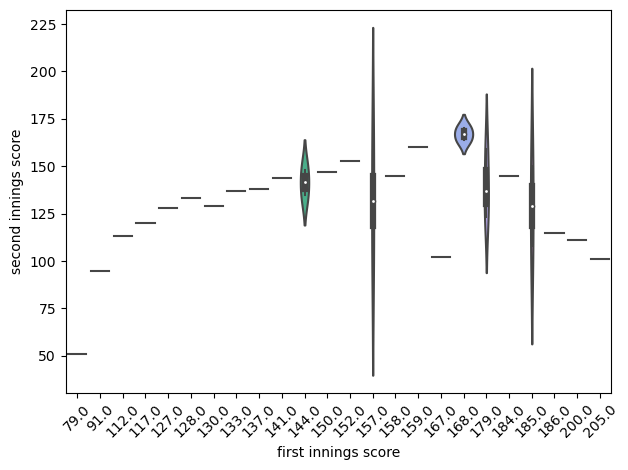

In [100]:
sns.violinplot(x='first innings score',y='second innings score',data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

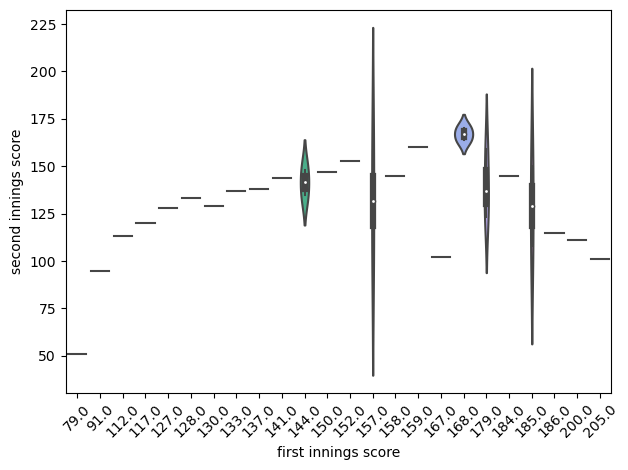

In [101]:
sns.violinplot(x='first innings score',y='second innings score',data=df,split=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


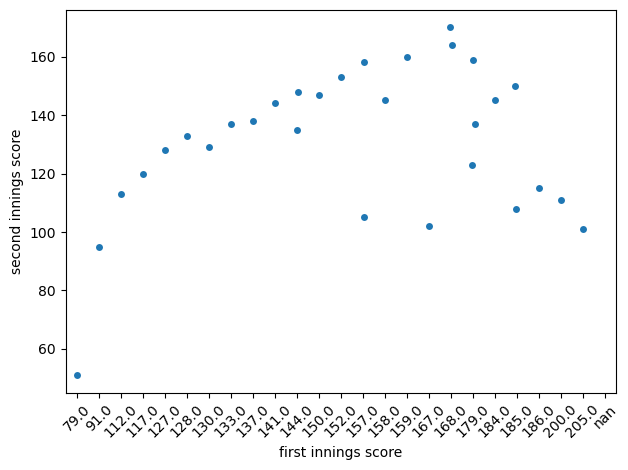

In [112]:
sns.stripplot(x='first innings score',y='second innings score',data=df,jitter=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rohan\AppData\Local\Temp\ipykernel_14668\701011605.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


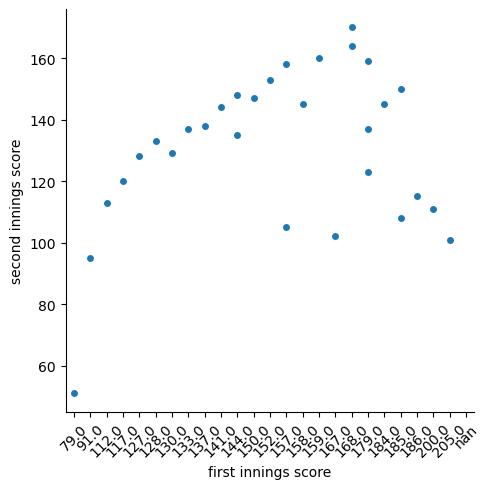

In [113]:
#For all types of plots use Factorplot
sns.catplot(x='first innings score', y='second innings score', data=df, kind='swarm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
#Predicting the winner with the summary of the match
import pandas as pd

df = pd.read_csv('t20-world-cup-22.csv')


print(df.head())

upcoming_match = {
    'venue': 'SCG',
    'team1': 'Australia',
    'team2': 'England',
    'stage': 'Super 12'
}

relevant_matches = df[(df['venue'] == upcoming_match['venue']) & (df['stage'] == upcoming_match['stage'])]

team1_wins = relevant_matches[relevant_matches['team1'] == upcoming_match['team1']]['winner'].value_counts().get(upcoming_match['team1'], 0)
team2_wins = relevant_matches[relevant_matches['team2'] == upcoming_match['team2']]['winner'].value_counts().get(upcoming_match['team2'], 0)

if team1_wins > team2_wins:
    predicted_winner = upcoming_match['team1']
elif team2_wins > team1_wins:
    predicted_winner = upcoming_match['team2']
else:
    predicted_winner = 'Unknown'

print(f"Predicted winner of the upcoming match: {predicted_winner}")


              venue        team1        team2     stage  toss winner  \
0               SCG  New Zealand    Australia  Super 12    Australia   
1     Optus Stadium  Afghanistan      England  Super 12      England   
2  Blundstone Arena      Ireland    Sri lanka  Super 12      Ireland   
3               MCG     Pakistan        India  Super 12        India   
4  Blundstone Arena   Bangladesh  Netherlands  Super 12  Netherlands   

  toss decision  first innings score  first innings wickets  \
0         Field                200.0                    3.0   
1         Field                112.0                   10.0   
2           Bat                128.0                    8.0   
3         Field                159.0                    8.0   
4         Field                144.0                    8.0   

   second innings score  second innings wickets       winner   won by  \
0                 111.0                    10.0  New Zealand     Runs   
1                 113.0                   

In [52]:
import pandas as pd

df = pd.read_csv('t20-world-cup-22.csv')


print(df.head())

upcoming_match = {
    'venue': 'Blundstone Arena',
    'team1': 'Ireland',
    'team2': 'Sri lanka',
    'stage': 'Super 12'
}

relevant_matches = df[(df['venue'] == upcoming_match['venue']) & (df['stage'] == upcoming_match['stage'])]

team1_wins = relevant_matches[relevant_matches['team1'] == upcoming_match['team1']]['winner'].value_counts().get(upcoming_match['team1'], 0)
team2_wins = relevant_matches[relevant_matches['team2'] == upcoming_match['team2']]['winner'].value_counts().get(upcoming_match['team2'], 0)

if team1_wins > team2_wins:
    predicted_winner = upcoming_match['team1']
elif team2_wins > team1_wins:
    predicted_winner = upcoming_match['team2']
else:
    predicted_winner = 'Unknown'

print(f"Predicted winner of the upcoming match: {predicted_winner}")


              venue        team1        team2     stage  toss winner  \
0               SCG  New Zealand    Australia  Super 12    Australia   
1     Optus Stadium  Afghanistan      England  Super 12      England   
2  Blundstone Arena      Ireland    Sri lanka  Super 12      Ireland   
3               MCG     Pakistan        India  Super 12        India   
4  Blundstone Arena   Bangladesh  Netherlands  Super 12  Netherlands   

  toss decision  first innings score  first innings wickets  \
0         Field                200.0                    3.0   
1         Field                112.0                   10.0   
2           Bat                128.0                    8.0   
3         Field                159.0                    8.0   
4         Field                144.0                    8.0   

   second innings score  second innings wickets       winner   won by  \
0                 111.0                    10.0  New Zealand     Runs   
1                 113.0                   

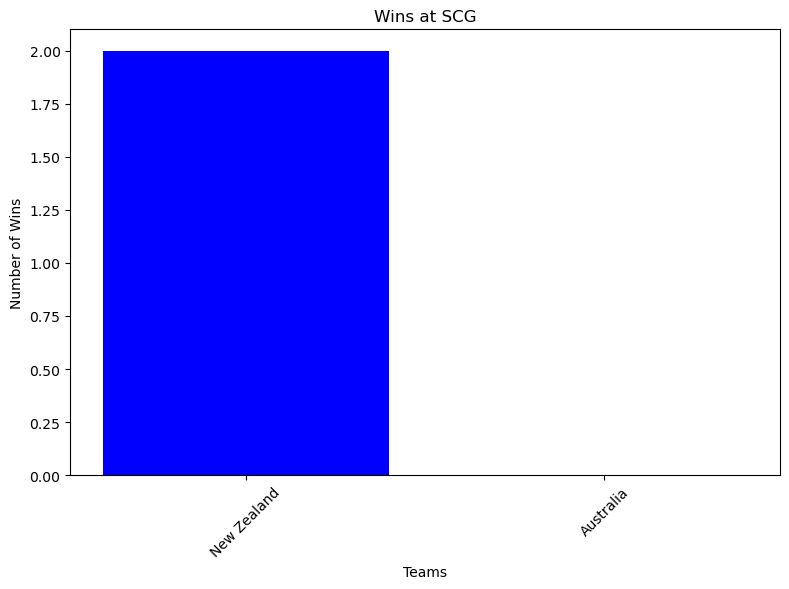

In [51]:
#Venue where which team has more probability i.e. batting or bowling
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('t20-world-cup-22.csv')

venue = 'SCG'

venue_matches = df[df['venue'] == venue]

team1_wins = venue_matches['winner'].value_counts().get(venue_matches['team1'].iloc[0], 0)
team2_wins = venue_matches['winner'].value_counts().get(venue_matches['team2'].iloc[0], 0)

plt.figure(figsize=(8, 6))
plt.bar([venue_matches['team1'].iloc[0], venue_matches['team2'].iloc[0]], [team1_wins, team2_wins], color=['blue', 'green'])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title(f'Wins at {venue}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
#The different types of the venues'SCG', 'Optus Stadium', 'Blundstone Arena', 'MCG', 'The Gabba','Adelaide Oval'

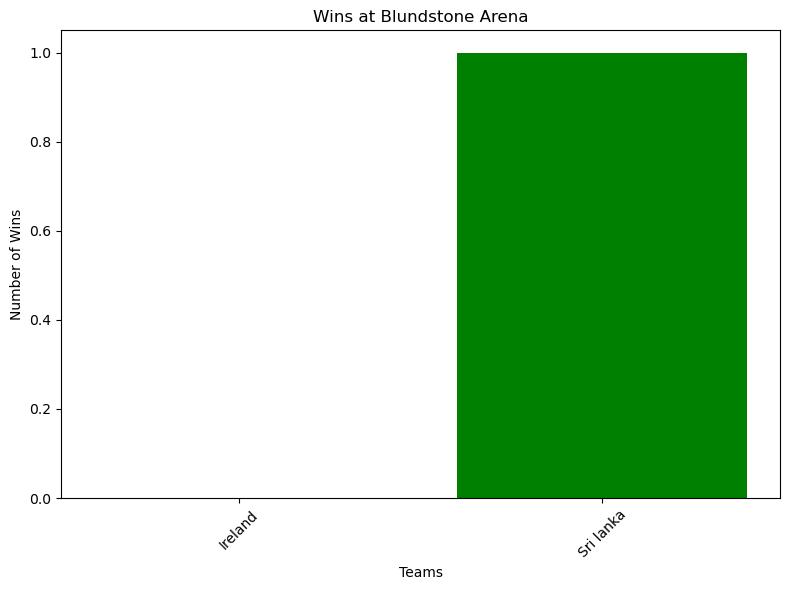

In [47]:
#Venue where which team has more probability i.e. batting or bowling
df = pd.read_csv('t20-world-cup-22.csv')

venue = 'Blundstone Arena'

venue_matches = df[df['venue'] == venue]

team1_wins = venue_matches['winner'].value_counts().get(venue_matches['team1'].iloc[0], 0)
team2_wins = venue_matches['winner'].value_counts().get(venue_matches['team2'].iloc[0], 0)

plt.figure(figsize=(8, 6))
plt.bar([venue_matches['team1'].iloc[0], venue_matches['team2'].iloc[0]], [team1_wins, team2_wins], color=['blue', 'green'])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title(f'Wins at {venue}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


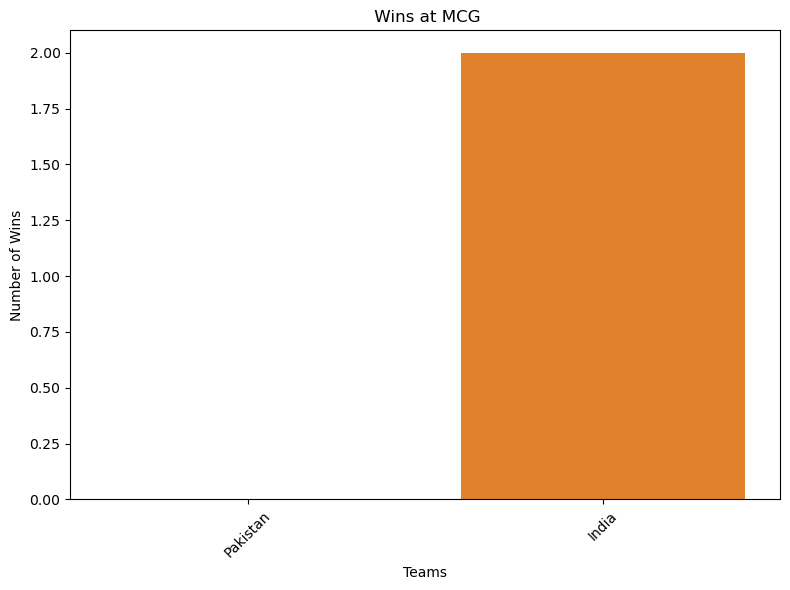

In [46]:
df = pd.read_csv('t20-world-cup-22.csv')

venue = 'MCG'

venue_matches = df[df['venue'] == venue]

team1_wins = venue_matches['winner'].value_counts().get(venue_matches['team1'].iloc[0], 0)
team2_wins = venue_matches['winner'].value_counts().get(venue_matches['team2'].iloc[0], 0)

plt.figure(figsize=(8, 6))
sns.barplot(x=[venue_matches['team1'].iloc[0], venue_matches['team2'].iloc[0]], y=[team1_wins, team2_wins])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title(f' Wins at {venue}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


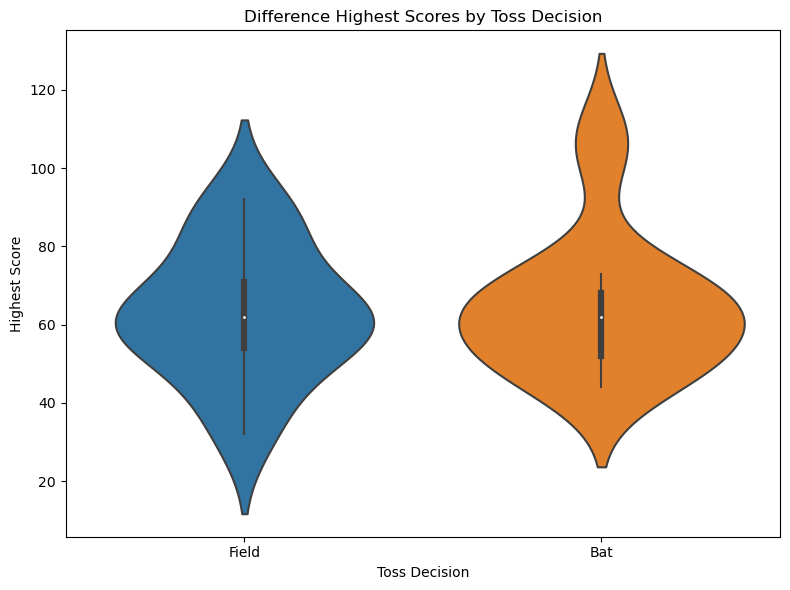

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='toss decision', y='highest score', data=df)
plt.title('Difference Highest Scores by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Highest Score')
plt.tight_layout()
plt.show()

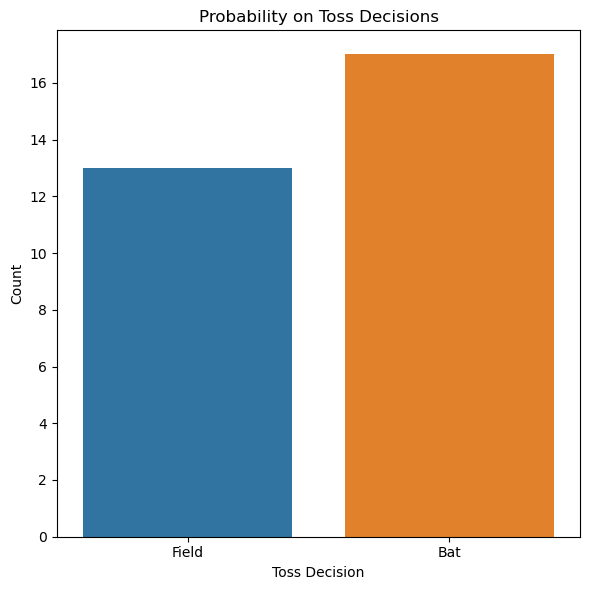

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x='toss decision', data=df)
plt.title('Probability on Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

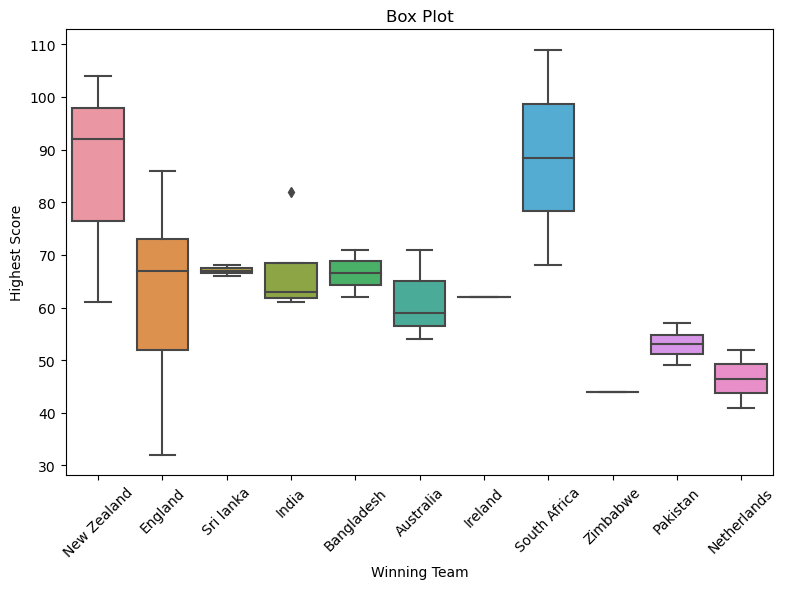

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='winner', y='highest score', data=df)
plt.title('Box Plot')
plt.xlabel('Winning Team')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

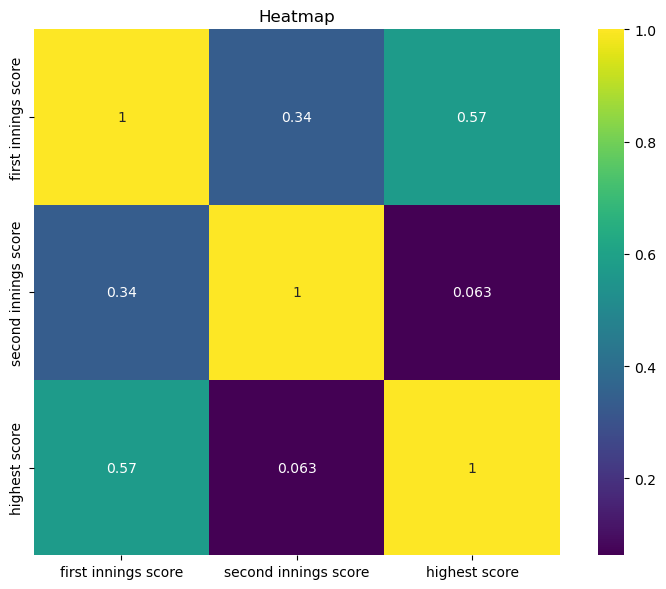

In [41]:
num = ['first innings score', 'second innings score', 'highest score']
num_data = df[num].dropna()
corr_matrix = num_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Heatmap')
plt.tight_layout()
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_59936\705778272.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

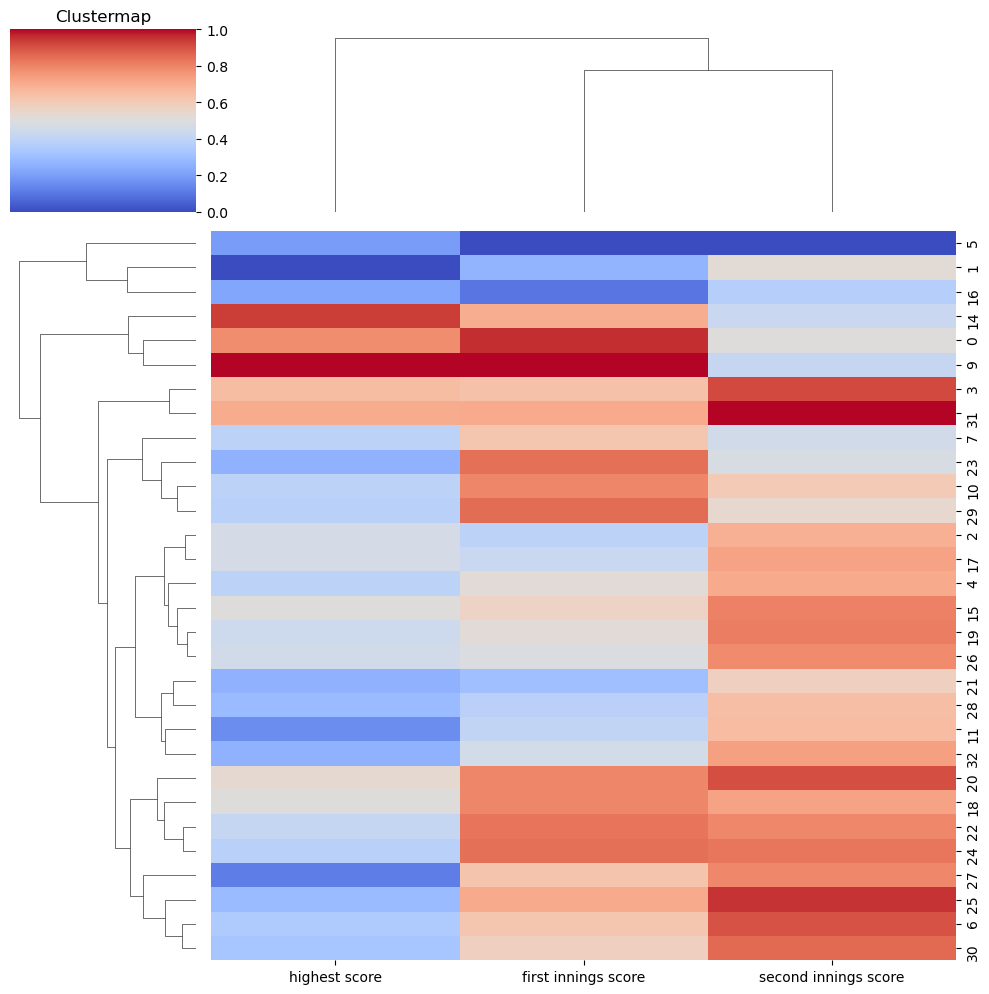

In [40]:
all_num_data = df.dropna(subset=num)[num]

plt.figure(figsize=(8, 6))
sns.clustermap(all_num_data, cmap='coolwarm', standard_scale=1)
plt.title('Clustermap')
plt.tight_layout()
plt.show()

In [39]:
#Bat or bowl probability depending upon the venue
venues = df['venue'].unique()
bat_win_prob = []
bowl_win_prob = []

for venue in venues:
    venue_matches = df[df['venue'] == venue]
    total_matches = len(venue_matches)
    bat_win_rate = len(venue_matches[venue_matches['toss decision'] == 'Bat']) / total_matches
    bowl_win_rate = len(venue_matches[venue_matches['toss decision'] == 'Field']) / total_matches
    bat_win_prob.append(bat_win_rate)
    bowl_win_prob.append(bowl_win_rate)

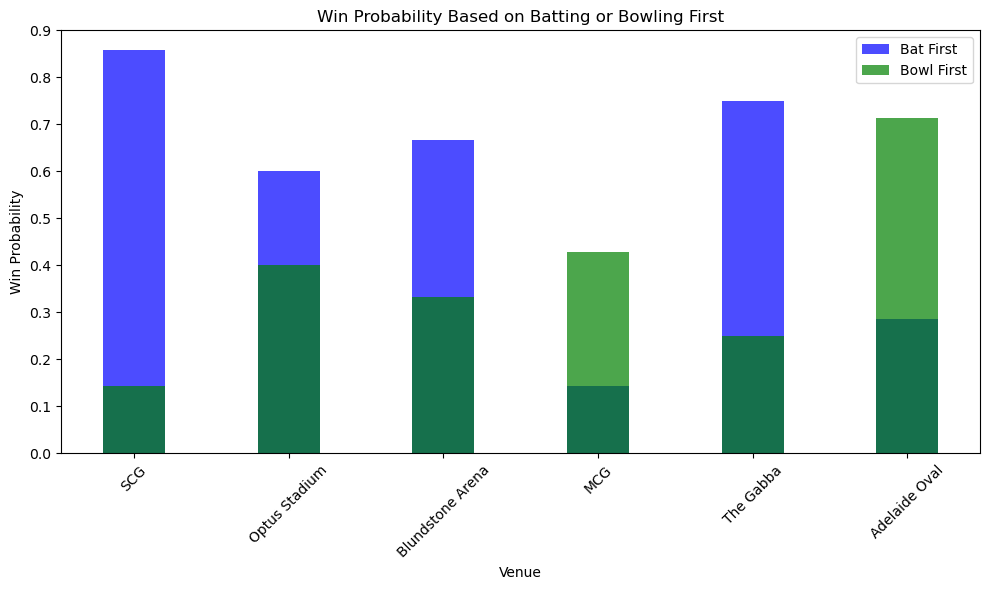

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(venues, bat_win_prob, width=0.4, label='Bat First', color='blue', alpha=0.7)
plt.bar(venues, bowl_win_prob, width=0.4, label='Bowl First', color='green', alpha=0.7)
plt.xlabel('Venue')
plt.ylabel('Win Probability')
plt.title('Probability Based on Batting or Bowling First')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x2d27953f590>,
 [Text(0, 0, 'Bat First'), Text(1, 0, 'Bowl First')])

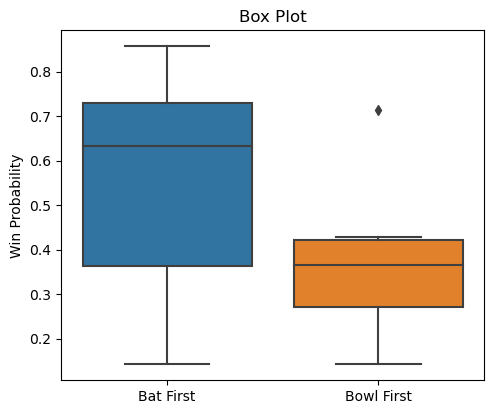

In [38]:
venue_win_prob_df = pd.DataFrame({
    'Venue': venues,
    'Bat Win Probability': bat_win_prob,
    'Bowl Win Probability': bowl_win_prob
})

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=venue_win_prob_df[['Bat Win Probability', 'Bowl Win Probability']])
plt.title('Box Plot')
plt.ylabel('Win Probability')
plt.xticks([0, 1], ['Bat First', 'Bowl First'])

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Pair Plot')

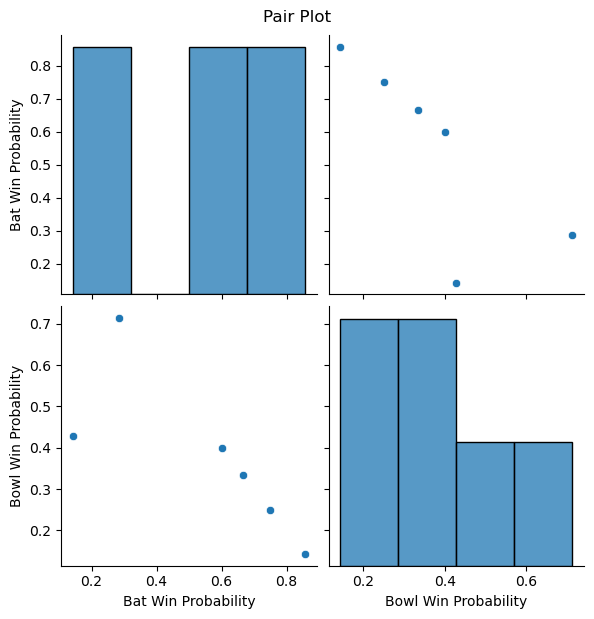

In [37]:
sns.pairplot(venue_win_prob_df[['Bat Win Probability', 'Bowl Win Probability']], height=3)
plt.suptitle('Pair Plot', y=1.02)

C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohan\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.02, 'Joint Plot of Win Probabilities')

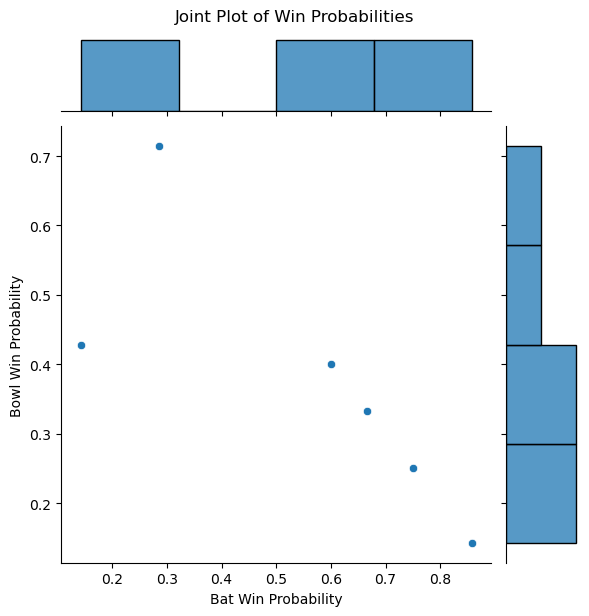

In [49]:
sns.jointplot(x='Bat Win Probability', y='Bowl Win Probability', data=venue_win_prob_df, kind='scatter')
plt.suptitle('Joint Plot of Win Probabilities', y=1.02)

([<matplotlib.axis.XTick at 0x2d27b7aeb50>,
 [Text(0, 0, 'Bat First'), Text(1, 0, 'Bowl First')])

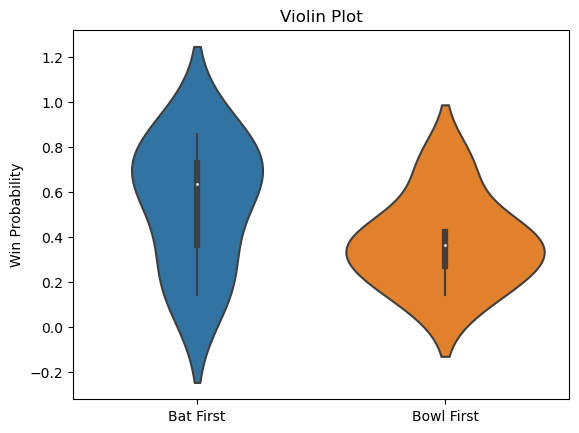

In [50]:
sns.violinplot(data=venue_win_prob_df[['Bat Win Probability', 'Bowl Win Probability']])
plt.title('Violin Plot')
plt.ylabel('Win Probability')
plt.xticks([0, 1], ['Bat First', 'Bowl First'])